In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import NearMiss, RandomUnderSampler
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
from collections import Counter
from pycaret.classification import * 

In [12]:
train = pd.read_csv( 'Downloads/MLI/TRAIN.csv', header = [0], index_col = [0] )
test = pd.read_csv( 'Downloads/MLI/TEST.csv', header = [0], index_col = [0] )
combined = [ train, test ]

Text(0.5, 1.0, 'Class Distribution')

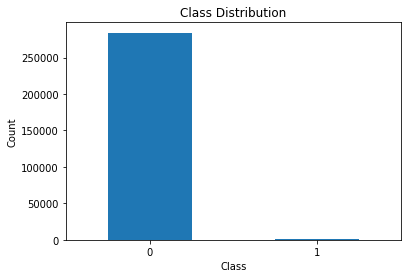

In [13]:
count = pd.value_counts( train['Class'], sort = True )
count.plot( kind = 'bar', rot = 0 )
plt.xlabel( 'Class' )
plt.ylabel( 'Count' )
plt.title( 'Class Distribution' )

In [14]:
train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2.245295,-1.160960,-1.966682,-1.430190,-0.607246,-1.508696,-0.074415,-0.655096,-1.970141,1.607283,-0.780267,-0.294928,1.236719,-0.135565,-0.832677,-1.400205,0.807960,-0.670317,-0.044106,-0.292081,0.010490,0.521714,-0.064971,0.048849,0.383290,0.103970,-0.047350,-0.064800,74.75,0
1,1.278609,0.102574,0.512079,0.003930,-0.723474,-1.334105,0.029958,-0.296595,0.128119,-0.209865,0.188511,0.674525,0.712608,0.122319,1.038024,0.128638,-0.222614,-0.687546,-0.056504,-0.040015,-0.081470,-0.182506,0.078986,0.789993,0.219794,0.938359,-0.078720,0.008119,1.38,0
2,1.466457,0.026088,-0.499298,-0.674372,-0.144883,-1.178075,0.058089,-0.420145,-1.359651,0.210249,-0.033777,-0.001594,1.767471,-1.212943,0.427684,1.252714,0.843412,-1.534474,0.830734,0.207653,-0.234087,-0.710542,-0.001242,-0.174713,0.533719,-0.454779,0.001524,0.030935,10.95,0
3,-0.922137,-0.371579,2.132018,-0.796997,0.324175,-1.162006,0.277208,-0.249586,-0.775648,-0.061757,-0.959725,0.408746,0.597641,-0.802430,-1.889520,-1.607785,-0.401475,0.729773,-2.445693,-0.461062,-0.302654,-0.246899,-0.045745,0.677110,0.016109,-0.734220,-0.034480,-0.064786,8.04,0
4,-1.166525,0.255439,2.108464,0.135019,-0.072979,0.910821,0.755918,0.355528,-0.422820,-0.842826,0.663538,0.624657,0.107262,-0.073654,-0.305506,0.618642,-0.952529,0.757618,-0.375461,0.353355,0.136470,0.017496,0.121017,0.636266,0.492943,-0.750242,0.029124,0.091303,175.00,0


In [15]:
test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.755477,-0.860198,-1.629185,0.164162,0.027778,-0.330613,0.216770,-0.215280,1.187584,-0.291611,-1.883296,0.107464,-0.180398,0.138906,-0.105876,-0.229330,-0.401810,-0.330877,0.620971,0.135129,-0.122173,-0.503867,-0.063954,-1.047319,-0.016514,-0.039022,-0.058861,-0.035955,186.76
1,-0.706506,1.155627,1.132585,2.742101,1.203095,0.013641,1.200743,-0.273633,-1.323403,1.138185,-1.275816,-1.087457,-0.936612,-0.041733,-1.153523,0.551025,-0.829644,-0.069660,-1.874384,-0.281283,0.352723,1.142657,-0.156382,1.139391,-0.151635,0.063306,-0.284146,-0.015198,21.18
2,1.043717,-0.928666,0.643312,-2.093695,-0.527878,1.420413,-1.053914,0.702897,2.450726,-1.767777,2.057099,2.184425,-0.470463,-0.016315,1.027377,-2.374469,1.332018,-1.536175,0.206623,-0.264045,0.008873,0.568767,0.070359,-0.978165,0.258814,-0.726163,0.176843,0.005530,1.00
3,-4.194074,4.382897,-5.118363,4.455230,-4.812621,-1.224645,-7.281328,3.332250,-3.679659,-7.524368,2.954344,-7.099825,1.520369,-7.687803,-0.225002,-8.520850,-13.277300,-5.253705,3.623332,0.579098,1.550473,0.614573,0.028521,0.013704,-0.149512,-0.131687,0.473934,0.473757,14.46
4,1.187587,0.173589,0.104741,1.143172,0.164552,0.162763,0.097302,0.001023,-0.013501,0.060962,0.318420,1.224034,0.632704,0.053400,-1.059099,-0.023212,-0.603919,0.155364,0.580959,-0.039666,-0.112873,-0.163529,-0.231334,-0.469322,0.832111,-0.312343,0.019521,0.005464,27.00


In [16]:
train.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000
mean,0.000779,-0.000811,0.001275,-0.000793,0.000592,0.000186,0.000951,-0.000270,0.000505,0.000948,-0.000669,0.001013,0.000120,0.001309,0.000053,0.000711,0.001262,0.000469,-0.000116,-0.000029,-0.000171,-0.000050,0.000027,0.000018,-0.000051,0.000028,-0.000037,-0.000028,88.359646,0.001547
std,1.956147,1.650234,1.510626,1.414216,1.378329,1.332161,1.232971,1.190897,1.097805,1.085083,1.018770,0.993861,0.995318,0.951702,0.915289,0.872882,0.839648,0.836807,0.813859,0.771083,0.732765,0.725495,0.624473,0.605645,0.521274,0.482243,0.403488,0.330127,250.177771,0.039299
min,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-13.563273,-25.162799,-9.335193,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,-0.920117,-0.598750,-0.889749,-0.848835,-0.691343,-0.768227,-0.553788,-0.208633,-0.642669,-0.535273,-0.762625,-0.405250,-0.648393,-0.425253,-0.582798,-0.467797,-0.483632,-0.498663,-0.456281,-0.211704,-0.228434,-0.542432,-0.161861,-0.354545,-0.317194,-0.326951,-0.070845,-0.052957,5.600000,0.000000
50%,0.018330,0.065238,0.179953,-0.020206,-0.054243,-0.274172,0.040265,0.022328,-0.051183,-0.092820,-0.032963,0.140170,-0.013518,0.050731,0.048122,0.066473,-0.065577,-0.003506,0.003738,-0.062480,-0.029520,0.006675,-0.011192,0.040977,0.016461,-0.052077,0.001337,0.011238,22.000000,0.000000
75%,1.315693,0.803357,1.027332,0.742635,0.612015,0.398641,0.570515,0.327214,0.597346,0.454005,0.739251,0.618276,0.662590,0.493220,0.648842,0.523282,0.399776,0.500875,0.458768,0.133013,0.186326,0.528481,0.147659,0.439527,0.350697,0.240929,0.091023,0.078271,77.200000,0.000000
max,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [17]:
print('Original dataset shape {}'.format(Counter(train['Class'])))

Original dataset shape Counter({0: 284015, 1: 440})


In [18]:
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
X = train.values[ :, :-1].copy()
Y = train.values[:,-1].copy().reshape( ( -1, 1 ) )

In [19]:
print( X.shape, Y.shape )

(284455, 29) (284455, 1)


In [20]:
X, Y = SMOTE().fit_resample( X, Y )

In [21]:
# nm = NearMiss()
# X, Y = nm.fit_sample( X, Y )

In [22]:
print('Resampled dataset shape {}'.format(Counter(Y)))

Resampled dataset shape Counter({0.0: 284015, 1.0: 284015})


In [23]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 0.3, random_state = 69 )
print( 'X_train: ', X_train.shape,'\nX_test: ', X_test.shape, '\nY_train: ', Y_train.shape, '\nY_test: ',Y_test.shape )

X_train:  (397621, 29) 
X_test:  (170409, 29) 
Y_train:  (397621,) 
Y_test:  (170409,)


In [24]:
print('Train Set {}'.format(Counter(Y_train)))
print('Test Set {}'.format(Counter(Y_test)))

Train Set Counter({1.0: 198856, 0.0: 198765})
Test Set Counter({0.0: 85250, 1.0: 85159})


In [25]:
normalizer = Normalizer()
X_train = normalizer.fit_transform( X_train )
X_test = normalizer.transform( X_test )

In [26]:
import tensorflow as tf
import keras
from keras import backend as K
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

Using TensorFlow backend.


In [27]:
def focal_loss(y_true, y_pred):
    g = 2.0
    alpha = 0.25
    pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
    pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))
    return -K.sum(alpha * K.pow(1. - pt_1, g) * K.log(pt_1))-K.sum((1-alpha) * K.pow( pt_0, g) * K.log(1. - pt_0))

In [28]:
#class_weights = { 1 : 0.95, 0 : 0.1 }

In [ ]:
mc = ModelCheckpoint( 'Downloads/MLI/model.h5', monitor = 'val_loss', mode = 'min', verbose = 1, save_best_only = True )
reduce_lr = ReduceLROnPlateau( monitor = 'val_loss', factor = 0.5, patience = 5, verbose = 1 )
model = Sequential()
model.add( Dense( units = 16, activation = 'relu', input_shape = ( 29, ) ) )
model.add( Dropout( 0.5 ) )
model.add( Dense( units = 32, activation = 'relu' ) )
model.add( Dropout( 0.5 ) )
model.add( Dense( units = 32, activation = 'relu' ) )
model.add( Dropout( 0.5 ) )
model.add( Dense( units = 24, activation = 'relu' ) )
model.add( Dropout( 0.5 ) )
model.add( Dense( units = 16, activation = 'relu' ) )
model.add( Dense( units = 1, activation = 'sigmoid' ) )
opt = tf.keras.optimizers.Adam( learning_rate = 0.01 )
model.compile( optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'] )
history = model.fit( X_train, Y_train, validation_data = ( X_test, Y_test ),  epochs = 100, batch_size = 64, callbacks = [ mc ] )

Train on 397621 samples, validate on 170409 samples
Epoch 1/100
397621/397621 [==============================] - 10s 24us/step - loss: 0.1836 - accuracy: 0.9285 - val_loss: 0.1261 - val_accuracy: 0.9535

Epoch 00001: val_loss improved from inf to 0.12611, saving model to Downloads/MLI/model.h5
Epoch 2/100
397621/397621 [==============================] - 9s 22us/step - loss: 0.1488 - accuracy: 0.9462 - val_loss: 0.0824 - val_accuracy: 0.9776

Epoch 00002: val_loss improved from 0.12611 to 0.08236, saving model to Downloads/MLI/model.h5
Epoch 3/100
397621/397621 [==============================] - 9s 23us/step - loss: 0.1379 - accuracy: 0.9502 - val_loss: 0.0650 - val_accuracy: 0.9782

Epoch 00003: val_loss improved from 0.08236 to 0.06505, saving model to Downloads/MLI/model.h5
Epoch 4/100
397621/397621 [==============================] - 10s 26us/step - loss: 0.1316 - accuracy: 0.9534 - val_loss: 0.0655 - val_accuracy: 0.9793

Epoch 00004: val_loss did not improve from 0.06505
Epoch 5/10

In [113]:
model = load_model( 'Downloads/MLI/model.h5' )

In [114]:
from sklearn.metrics import roc_curve, confusion_matrix, roc_auc_score, classification_report

<AxesSubplot:>

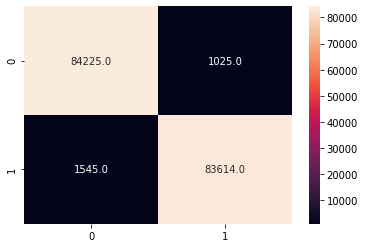

In [115]:
cm = confusion_matrix( Y_test, model.predict_classes( X_test ) )
sns.heatmap( cm, annot = True, fmt = '.1f' )

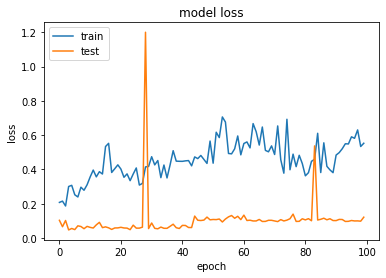

In [116]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

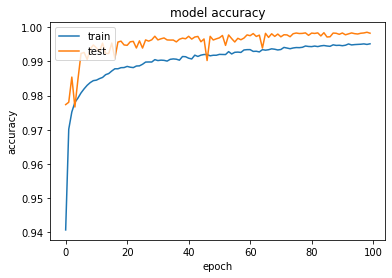

In [104]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [105]:
print( classification_report( Y_test, model.predict_classes( X_test ) ) )

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     85250
         1.0       1.00      1.00      1.00     85159

    accuracy                           1.00    170409
   macro avg       1.00      1.00      1.00    170409
weighted avg       1.00      1.00      1.00    170409



In [106]:
print( "AUC Score: ", roc_auc_score( Y_test , model.predict_proba( X_test ) ) )

AUC Score:  0.9998156760345379


In [50]:
test = test.values

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [38]:
test = normalizer.transform( test )

In [107]:
temp = pd.read_csv( 'Downloads/MLI/TEST.csv', header = [0] )
submission = pd.DataFrame( model.predict_classes( test ) )
submission = pd.concat( [temp.iloc[:,0], submission ], axis = 1 )

In [108]:
pd.DataFrame( model.predict_classes( X_test ) )

,0
0,0
1,1
2,1
3,0
4,1
...,...
170404,0
170405,1
170406,1
170407,0


In [109]:
submission.to_csv( 'Downloads/MLI/Submission.csv', index_label = None, index = False, header = ['Index', 'Class'] )